# PHYS591000 Lab 03
--- 
## Goal

In lab 03, you will practice:

1. Unsupervised learning
     * Data visualze and clustering using unsupervised learning.
     * Difference between classical method and modern algorithm.
2. Supervised learning
    * Using scikit learn module as a supervise learning to deal with a regression problem

## Useful Reference
1. [Lee Hung-Yi's Lecture Note](https://hackmd.io/@shaoeChen/B1e4z59o7?type=view#Clustering)
2. [Jet image and clustering](https://agenda.infn.it/event/4804/attachments/39245/46291/clustering.pdf)
3.  [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

# First Part - Unsupervised learning

### 1 Jet clustering and unsupervised learning.

In in-class practice section, you learned how to cluster jet data using K-means algorithm.  
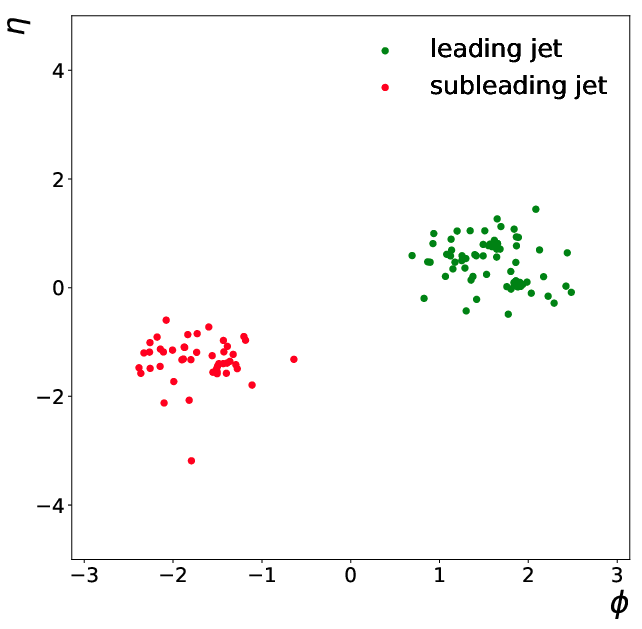
Now, please try to use the data in `/kaggle/input/phys591000-week03/ttbar_one_event.npz` to cluster a result by yourself.  

1.1 Load the dataset from `/kaggle/input/phys591000-week03/ttbar_one_event.npz` and show the content inside it.  
1.2 Using K-means algorithm and the data you have to cluste the jets.  
1.3 Compute the total `pt` in each cluster.  
1.4 Please Describe the difference compare to classical anti-Kt algorithm.  


In [1]:
##############################################################################
#Code for 1.1
# 1. 1 Load the dataset from `/kaggle/input/phys591000-week03/ttbar_one_event.npz` and show the content inside it.
##############################################################################
# Please code in this cell
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math

ttbar = np.load('/kaggle/input/phys591000-week03/ttbar_one_event.npz')
print(ttbar.files)

##############################################################################

['e', 'eta', 'phi']


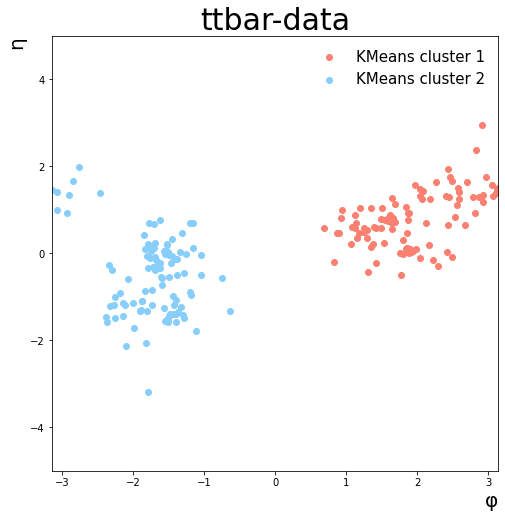

In [2]:
##############################################################################
#Code for 1.2
# 1. 2 Using K-means algorithm and the data you have to clustr the jets.
##############################################################################
# Please code in this cell

from sklearn.cluster import KMeans

X = []
for i in range(len(ttbar["phi"])):
    X.append([ttbar["phi"][i],ttbar["eta"][i]])
    

kmeans_cluster = KMeans(n_clusters=2, random_state=0).fit(X)

cls_0 = kmeans_cluster.labels_ == 0 
cls_1 = kmeans_cluster.labels_ == 1 
#cls_2 = kmeans_cluster.labels_ == 2
#cls_3 = kmeans_cluster.labels_ == 3
fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.scatter(ttbar["phi"][cls_0],ttbar["eta"][cls_0], c= "salmon", label = "KMeans cluster 1") 
plt.scatter(ttbar["phi"][cls_1],ttbar["eta"][cls_1], c= "lightskyblue", label = "KMeans cluster 2")
#plt.scatter(ttbar["phi"][cls_2],ttbar["eta"][cls_2], c= "red", label = "KMeans cluster 3")
#plt.scatter(ttbar["phi"][cls_3],ttbar["eta"][cls_3], c= "green", label = "KMeans cluster 3")
plt.xlim(-np.pi,np.pi)
plt.ylim(-5,5)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.ylabel("η", fontsize=20,horizontalalignment='right',y=1)
plt.xlabel("φ", fontsize=20,horizontalalignment='right',x=1)
plt.title("ttbar-data", fontsize=30)
plt.legend(loc="best",ncol=1,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()

##############################################################################

In [3]:
##############################################################################
#Code for 1.3
# 1. 3 Compute the total `pt` in each cluster.
##############################################################################
# Please code in this cell

energy_0 = 0.0
energy_1 = 0.0
#energy_2 = 0.0
#energy_3 = 0.0
for i in range(len(ttbar["e"][cls_0])):
    energy_0 = energy_0 + ttbar["e"][cls_0][i]
    
for i in range(len(ttbar["e"][cls_1])):
    energy_1 = energy_1 + ttbar["e"][cls_1][i]
    
#for i in range(len(ttbar["e"][cls_2])):
    #energy_2 = energy_2 + ttbar["e"][cls_2][i]
    
#for i in range(len(ttbar["e"][cls_3])):
    #energy_3 = energy_3 + ttbar["e"][cls_3][i]


print('e_cls_0:', energy_0)
print('e_cls_1:', energy_1)
#print('e_cls_2:', energy_2)
#print('e_cls_3:', energy_3)



##############################################################################

e_cls_0: 368.12775458611753
e_cls_1: 323.39148539154866


This picture is the result of anti-Kt algorithm.  
Please use this figure to answer the question 1.4.  
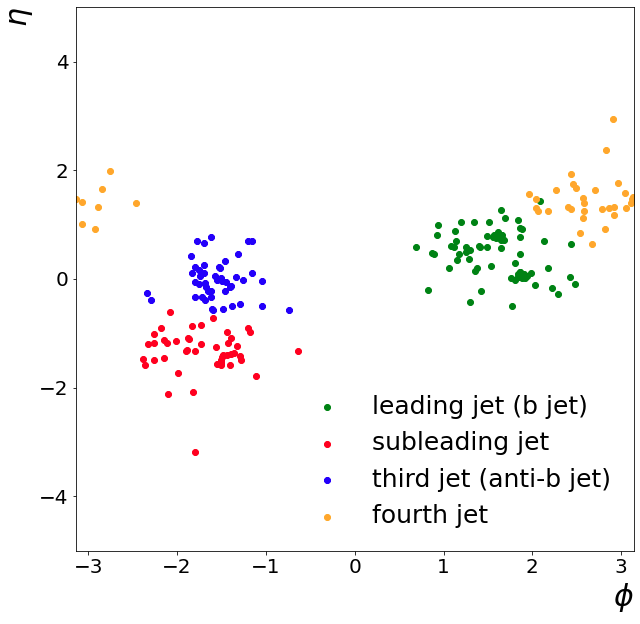

##############################################################################
### 1.4 Description
Please Describe the difference compare to classical anti-Kt algorithm.

**Ans:**

We first plotted the scatter figure of the data, and found that they have clear distinction for lower phi and larger phi. Therefore we used K-means algorithm to cluster the data into two groups. By the result of the K-means algorithm, we can clearly observe the difference between two groups in lower or higher phi, but we can not clearly distingush the two groups in eta range. In second cluster, there are small amount of data are scatterd differently, but we can not find the reason only by observing the results of K-means algorithm. In the result of anti-Kt algorithm, we can observe the data was clustered into 4 jets, so that we can know the detector received jets in different angles phi and eta. Also we found the forth jets are scattered around -pi and pi, so we estimate that the figure is a cylinder, that's the reason why there are small amount of data are scatterd differently in second cluster of K-means algorithm. We think using the anti-Kt algorithm can know more clear meaning and real structure of the data. But if we have known the meaning of the data, we also can have some adjustment to K-means algorithm and get great result of cluster.

##############################################################################

# Second Part - Supervised learning


2.1 

Load data from '/kaggle/input/phys591000-week03/Projectile_data.npy'.

Consider first column of the data as x, second column as y, plot scatter(x,y).

2.2

We are going to use polynomial function to fit this data. You will describe your estimation in this cell.

2.3

We will use scikit-learn to fit this data.

2.4

Visualize Your Result

2.5

If this data is a projectile trajectory in acceleration g = 9.8.

Please find out the initial velocity, the launch angle and the highest altitude.


### 2.1 Load data
* Load data from '/kaggle/input/phys591000-week03/Projectile_data.npy'.

* Consider first column of the data as x, second column as y, plot scatter(x,y).

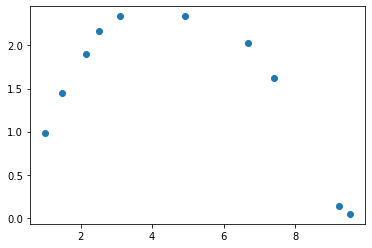

In [4]:
##############################################################################
# Code for 2.1
# 2. 1 Load the data from `/kaggle/input/phys591000-week03/Projectile_data.npy` and plot the diagram.
##############################################################################
# Please code in this cell

project = np.load('/kaggle/input/phys591000-week03/Projectile_data.npy')

x = project[:,0]
y = project[:,1]
plt.scatter(x,y)
plt.show()

##############################################################################

##############################################################################
### 2.2 Description 
We are going to use polynomial function to fit this data.
Please estimate the order of this  polynomial function.


**Ans:**

The shape of data is like a parabola,which has a downward opening. Thus, we guess that it is quadratic function.
 
##############################################################################

### 2.3 Fitting

In [5]:
##############################################################################
#Code for 2.3
# Please use PolynomialFeatures in scikit-learn to solve this problem.

# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
##############################################################################
# Please code in this cell

poly = PolynomialFeatures(3,include_bias = False)
x_poly = poly.fit_transform(x[:,None])

model = LinearRegression()
model.fit(x_poly, y)
slope_2 = model.coef_[2]
slope_1 = model.coef_[1]
slope_0= model.coef_[0]
print('third coef:',slope_2)
print('second coef:',slope_1)
print('first coef:',slope_0)
print('Because the coefficient of x^3 of third degree polynomial function fitting result is very small, so we estimate the curve is the second polynomial function ')

##############################################################################

third coef: 0.004340422292352708
second coef: -0.175562028532894
first coef: 1.2876316243682542
Because the coefficient of x^3 of third degree polynomial function fitting result is very small, so we estimate the curve is the second polynomial function 


### 2.4 Visualize Your Result

fitting with second degree polynomial
second coef: -0.10597142364738658
first coef: 0.9758055570107389


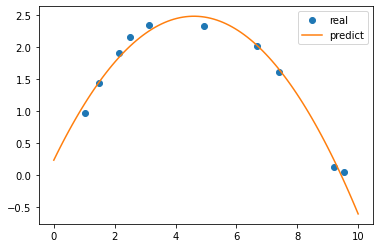

In [6]:
##############################################################################
# Code for 2.4
# Please use matlibplot to make a plot for your fitting result.
# And show each coeficient of the polynomial function.
# e.g. y = a*x^3 + b*x^2 + c*x + d
# print('x^3:',a,'x^2:',b,'x:',c, 'constant', d)
##############################################################################
# Please code in this cell
print('fitting with second degree polynomial')
poly = PolynomialFeatures(2,include_bias = False)
x_poly = poly.fit_transform(x[:,None])

model = LinearRegression()
model.fit(x_poly, y)
slope_1 = model.coef_[1]
slope_0= model.coef_[0]

print('second coef:',slope_1)
print('first coef:',slope_0)

fit_x = np.linspace(0, 10, 100)
poly_1 = PolynomialFeatures(2,include_bias = False)
xfit = poly_1.fit_transform(fit_x[:,None])
fit_y = model.predict(xfit)

plt.plot(x,y,'o',label='real')
plt.plot(fit_x,fit_y,label='predict')
plt.legend()
plt.show()

##############################################################################

$y =-0.10597x^2+0.9758x$ 

In [7]:
#calculation of 2.5

theta = np.arctan(slope_0)
print('angle:',theta)

v0 = (-9.8*0.5/slope_1/(np.cos(theta))**2)**0.5
print('initial velocity:',v0)

h = ((v0*np.sin(theta))**2)/2/9.8
print('highest altitude:',h)

angle: 0.7731534191191595
initial velocity: 9.500914697493359
highest altitude: 2.246352017175437


##############################################################################
### 2.5 Description 

If this data is a projectile trajectory in acceleration g = 9.8.

Please find out the initial velocity, the launch angle and the highest altitude.

**Ans:**

$x=v_0\cos\theta t$ ,so $t=\frac{x}{v_0\cos\theta}$

$y=v_0\sin\theta t - \frac{1}{2}gt^2
=v_0\sin\theta\frac{x}{v_0\cos\theta}-\frac{1}{2}g\frac{x^2}{v_0^2\cos^2\theta}=\tan\theta x-\frac{1}{2}\frac{g}{v_0^2\cos^2\theta}x^2$

launch angle: $\theta = \arctan0.9758= 0.7732 (Rad)$

initial velocity: $v_0 = 9.5009(m/s)$

highest altitude: $h=2.2464(m)$



 
##############################################################################

# Bonus [10pt]

#### There is a extra data: "/kaggle/input/phys591000-week03/Bonus.npy".
#### Please come up a model or function to discribe this data set and fit the data to get coeficients.


0.5219062521671972 5.543384919267158


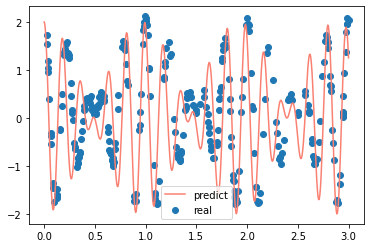

In [8]:
from scipy import optimize
extra = np.load('/kaggle/input/phys591000-week03/Bonus.npy')
x = extra[:,0]
y = extra[:,1]

def beat(x,f1,f2):
    return 2*np.cos(2*np.pi*f1*x)*np.cos(2*np.pi*f2*x)
    
para, other = optimize.curve_fit(beat,x,y,p0=[0.52,5.54])

fit_x = np.linspace(0, 3, 500)
f1 = para[0]
f2 = para[1]
print(f1,f2)
fit_y = beat(fit_x,f1,f2)
plt.scatter(x,y,label='real')
plt.plot(fit_x,fit_y,label='predict',color='salmon')
plt.legend()
plt.show()

# Bonus [5pt]

#### Please come up a physics system can be described by this data.

#### Describe: 

When we observe the shape of data, we find that it doesn't just look like a single sine wave.
It looks like it has a bigger wave on the outside, and inside that there is a smaller wave.
therefore, we guess that it is a beat, which is an interference pattern of two wave with slightly different frequency.
Here is equation of beat: 

$\cos(2\pi f_1 t)+\cos(2\pi f_2 t) = 2\cos(2\pi\frac{f_1+f_2}{2}t)\cos(2\pi\frac{f_1-f_2}{2}t)$

By calculation, we know that the frequency of bigger wave(beat frequency) is 0.5219Hz,and frequency of the modulation is 5.5434Hz.

Example: musicians will use interference beat as Metronome.